In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
#df_times = pd.read_csv("Berlin_Marathon_data_1974_2019.csv", low_memory=False)
#df_weather = pd.read_csv("Berlin_Marathon_weather_data_since_1974.csv", low_memory=False)
df = pd.read_csv('data/master_berlin_data.csv')

<AxesSubplot:xlabel='year', ylabel='median_time'>

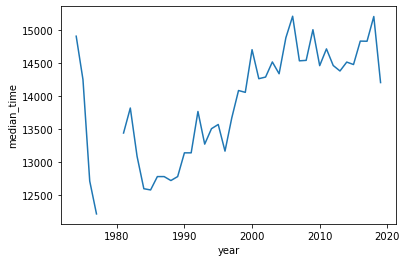

In [4]:

sns.lineplot(x='year', y='median_time', data=df)

In [5]:
finishers = pd.read_csv('data/Berlin_Finishers - Sheet1.csv')
finishers = finishers.rename(columns={"Year": "year"})
finishers = finishers.iloc[::-1]

In [6]:
master = pd.merge(df, finishers, on='year')
master = master.rename(columns={'Males.1': 'percent_male', 'Females.1': 'percent_female'})
def convert_string_with_commas_to_int(series):
    new_series = []
    for i in series:
        try:
            i = int(i)
            new_series.append(i)
        except ValueError:
            i = i.split(',')
            i = ''.join(i)
            new_series.append(i)
    return pd.Series(new_series)
master['Total'] = convert_string_with_commas_to_int(master['Total'])
type(master['Total'][1])

int

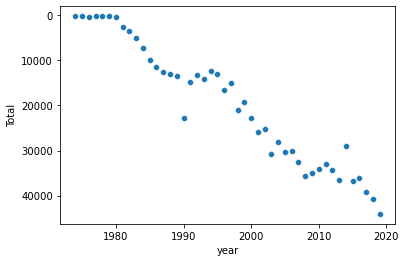

In [7]:
total_graph = sns.scatterplot(data=master, x='year', y='Total')

In [8]:
master_altered = master.iloc[:,0:12].fillna(method='bfill')

master_altered.info()
master_altered

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              46 non-null     int64  
 1   avg_time          46 non-null     float64
 2   fastest           46 non-null     float64
 3   median_time       46 non-null     float64
 4   slowest           46 non-null     float64
 5   PRECIP_mm         46 non-null     float64
 6   SUNSHINE_hrs      46 non-null     float64
 7   CLOUD_hrs         46 non-null     float64
 8   ATMOS_PRESS_mbar  46 non-null     float64
 9   AVG_TEMP_C        46 non-null     float64
 10  MAX_TEMP_C        46 non-null     float64
 11  MIN_TEMP_C        46 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 5.9 KB


,year,avg_time,fastest,median_time,slowest,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
0,1974,15052.725410,9893.0,14908.5,21353.0,0.0,0.20,7.0,1009.50,5.4,8.8,1.1
1,1975,14735.639485,10028.0,14251.0,21582.0,4.2,9.40,3.0,1011.40,14.3,20.1,9.5
2,1976,13177.877814,8588.0,12712.0,21719.0,3.0,10.20,3.3,1010.40,12.8,18.0,7.3
3,1977,12382.859649,8180.0,12214.0,19076.0,11.2,0.00,8.0,1013.10,9.7,12.5,7.4
4,1978,12584.328829,8469.0,12427.5,19570.0,1.8,2.70,6.0,1000.60,11.2,14.5,9.4
5,1979,12584.328829,8469.0,12427.5,19570.0,0.0,5.40,2.0,1019.00,8.4,15.2,2.9
6,1980,13590.503535,8142.0,13440.5,28723.0,0.0,10.10,0.7,1017.50,9.8,17.5,4.9
7,1981,13590.503535,8142.0,13440.5,28723.0,0.1,3.60,7.3,1000.90,16.3,21.5,14.8
8,1982,13874.243329,7924.0,13819.5,18428.0,0.7,10.10,1.0,1004.00,17.6,25.4,12.0
9,1983,13181.544102,7928.0,13087.0,18626.0,0.0,9.80,2.3,1021.40,11.2,20.3,9.3


<AxesSubplot:xlabel='MAX_TEMP_C', ylabel='median_time'>

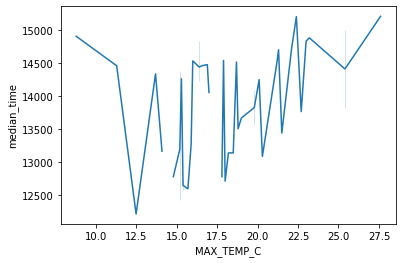

In [9]:
only_median_diff = master.fillna(method='bfill')

sns.lineplot(data=master, x='MAX_TEMP_C', y='median_time')

In [10]:
master_altered = master_altered.diff()
master_altered = master_altered.iloc[1:,:]
sns.pairplot(master_altered)

In [11]:
median_weather = master_altered[['median_time','MAX_TEMP_C']]

In [12]:
median_weather_train = median_weather.iloc[:36]
median_weather_test = median_weather.iloc[36:].copy()

In [13]:
lm = LinearRegression(fit_intercept=True)
median_weather_train

,median_time,MAX_TEMP_C
1,-657.5,11.3
2,-1539.0,-2.1
3,-498.0,-5.5
4,213.5,2.0
5,0.0,0.7
6,1013.0,2.3
7,0.0,4.0
8,379.0,3.9
9,-732.5,-5.1
10,-491.0,-4.6


In [14]:
lm.fit(X = median_weather_train.MAX_TEMP_C.to_frame(), y=median_weather_train.median_time)
slope = lm.coef_
intercept = lm.intercept_

In [15]:
median_weather_train['median_time_prediction'] = lm.predict(median_weather_train.MAX_TEMP_C.to_frame())
median_weather_train

<ipython-input-15-7759a835c9e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_weather_train['median_time_prediction'] = lm.predict(median_weather_train.MAX_TEMP_C.to_frame())


,median_time,MAX_TEMP_C,median_time_prediction
1,-657.5,11.3,603.375474
2,-1539.0,-2.1,-131.354748
3,-498.0,-5.5,-317.778834
4,213.5,2.0,93.450768
5,0.0,0.7,22.170970
6,1013.0,2.3,109.899952
7,0.0,4.0,203.111995
8,379.0,3.9,197.628934
9,-732.5,-5.1,-295.846588
10,-491.0,-4.6,-268.431282


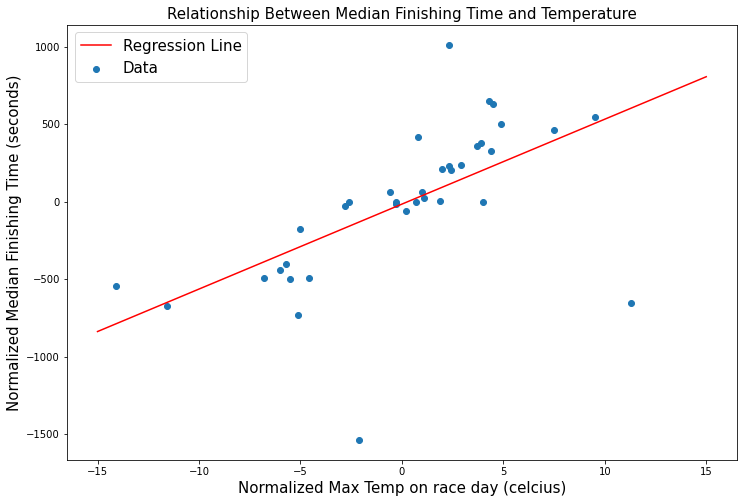

In [16]:
x_lin = np.array([-15,15])
y_lin = intercept + slope * x_lin
plt.figure(figsize=(12,8))
plt.scatter(x=median_weather_train.MAX_TEMP_C, y=median_weather_train.median_time, label="Data")
plt.plot(x_lin, y_lin, c="red", label="Regression Line")
plt.xlabel("Normalized Max Temp on race day (celcius)", fontsize=15)
plt.ylabel("Normalized Median Finishing Time (seconds)", fontsize=15)
plt.title("Relationship Between Median Finishing Time and Temperature", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [17]:
slope

array([54.83061355])

for every degree celsius youll lose approx 54 seconds over the marathon distance
- should note that berlin is rareley run in weather that is considered "too cold" but at some point being colder would have a negative effect

Text(0.5, 1.0, 'Fastest Finishing Time and Temperature')

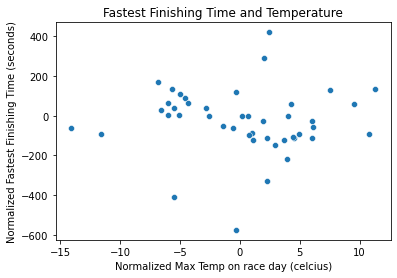

In [25]:

master_altered_no_fast_outlier = master_altered.drop([2])
master_altered_no_fast_outlier
sns.scatterplot(data=master_altered_no_fast_outlier, x='MAX_TEMP_C', y='fastest')
plt.xlabel("Normalized Max Temp on race day (celcius)")
plt.ylabel("Normalized Fastest Finishing Time (seconds)")
plt.title("Fastest Finishing Time and Temperature")